In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data
df=pd.read_csv ('../data/processed/vehicles-v1.csv')

In [3]:
#familiarize
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.shape

(426880, 16)

In [5]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [6]:
df.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
153560,kokomo,25990,2019.0,ram,1500 classic regular cab,good,8 cylinders,gas,12302.0,clean,other,NaN,NaN,pickup,white,in
199147,flint,9995,2010.0,chevrolet,equinox ltz awd,NaN,NaN,gas,104723.0,clean,automatic,NaN,NaN,NaN,NaN,mi
190223,western massachusetts,99,2017.0,jaguar,f-type,NaN,NaN,gas,12602.0,clean,automatic,NaN,full-size,convertible,red,ma
39851,monterey bay,750,1980.0,cadillac,lemousine,fair,8 cylinders,gas,100000.0,missing,automatic,fwd,full-size,NaN,white,ca
86522,new haven,25990,2019.0,ram,1500 classic regular cab,good,8 cylinders,gas,12302.0,clean,other,NaN,NaN,pickup,white,ct


In [7]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#uc as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([df.isnull().sum(),100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count',ascending=False)

,count,%
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179
odometer,4400,1.030735


In [8]:
df.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [9]:
df.manufacturer.value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [10]:
df_price_manufacturer=df[["manufacturer", "price"]]
means = df_price_manufacturer.groupby('manufacturer')['price'].mean()
means=pd.DataFrame(means)
means.head()

,price
manufacturer,
acura,19842.869522
alfa-romeo,28237.348941
aston-martin,53494.541667
audi,23574.849993
bmw,26740.261446


In [11]:
means=means.sort_values('price')
means

,price
manufacturer,
mercury,5482.536318
saturn,6881.734862
land rover,7911.095238
pontiac,8176.903409
chrysler,10442.946609
hyundai,10719.659412
honda,10751.363722
kia,11083.324820
fiat,11890.517677


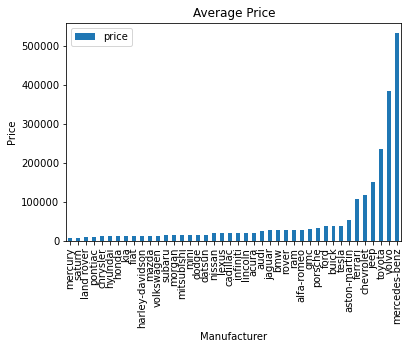

In [12]:
ax = means.plot(kind='bar')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Price')
ax.set_title('Average Price')
plt.show()

In [13]:
df.price

0          6000
1         11900
2         21000
3          1500
4          4900
          ...  
426875    23590
426876    30590
426877    34990
426878    28990
426879    30590
Name: price, Length: 426880, dtype: int64

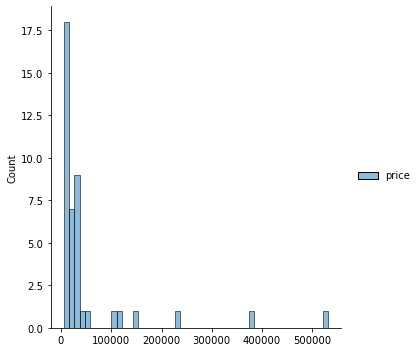

In [14]:
sns.displot(means,bins=50)
plt.show()

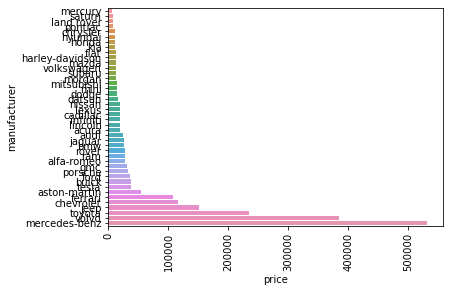

In [29]:
sns.barplot(y=means.index, x=means.price)

plt.xticks(rotation="vertical")

plt.show()

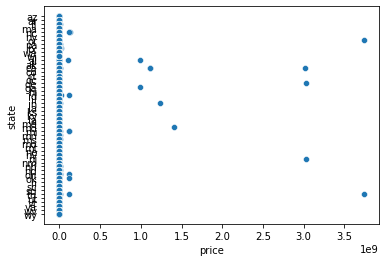

In [35]:
sns.scatterplot(y=df.state, x=df.price)
plt.show()